<span style="font-size:20px; color:red;"> SUBJECT:</span>
<span style="font-size:18px">The asteroid named Apophis will pass close to Earth in April 2029.<br>
 
<span style="font-size:20px; color:red;"> GOALS:</span>
<span style="font-size:16px">
1. Examining Apophis in the exact time period: January 01, 2029 - July 31, 2029. <br>
2. Plotting the distance of Apophis from the Sun, Moon and Earth over that time.
3. Plotting the change of the Earth-Apophis-Sun angle over time.
4. Showing the ground-track of Apophis around the Time of Closest Approach (TCA) (within a total of 12 hours, 6 hours before and after). A map drawing showing which points Apophis passed over on the Earth's surface.

<span style="font-size:20px; color: red; "> LIBRARIES: </span> 
<span style="font-size:16px"> 
1. import numpy as np<br>
Purpose: Used for numerical calculations and data operations
2. import matplotlib.pyplot as plt <br>
Purpose: Used for drawing graphs.
3. import spiceypy as spice<br>
Purpose: Python interface to NASA's SPICE library.
4. from datetime import datetime, timedelta<br>
Purpose: Used for performing time and date operations.
5. import matplotlib.image as mpimg<br>
Purpose: Reading visual files and using them with matplotlib.
6. from matplotlib.dates import DateFormatter<br>
Purpose: Used for formatting time axes in matplotlib graphs.
7. import os<br>
Purpose: Used for file operations related to the operating system.<br>
File path control, directory creation, file existence control.

In [21]:
# %%
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice
from datetime import datetime, timedelta
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
import os

# %%
# These are for editing the appearance of the drawings. When the code is run, the graphics that will be drawn:
# Do not need LaTeX,
# Have a readable font size,
# The lines should not be too thick or too thin

# Set plotting preferences - DISABLE LaTeX which is causing the error
plt.rcParams['text.usetex'] = False  # Changed from True to avoid LaTeX errors
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1

# %%
# Clear previous SPICE kernels
spice.kclear()

# %%
# naif0012.tls --->	Time (LSK) file: UTC ↔ Ephemeris Time conversions
# de432s.bsp  --->	Planet Ephemeris (SPK): Positions of Solar System objects
# 20099942_Apophis.bsp --->	Orbit of Asteroid Apophis
# gm_de432.tpc --->	Gravitational constants (PCK): Sun, planet masses
# pck00010.tpc --->	Planet rotation and orientation information (PCK)

# %%
# Check if kernel files exist before loading
kernel_files = [
    'kernels/naif0012.tls',
    'kernels/de432s.bsp',
    'kernels/20099942_Apophis.bsp',
    'kernels/gm_de432.tpc',
    'kernels/pck00010.tpc'
]

#When the Python program is run, it checks if there is a folder called "kernels".
#If it doesn't exist → it creates this folder.
os.makedirs('kernels', exist_ok=True)

missing_files = [f for f in kernel_files if not os.path.exists(f)]
if missing_files:
    print("Warning: The following SPICE kernel files are missing:")
    for file in missing_files: 
        print(f" - {file}") #Lists each missing file name in the loop above
    print("\nPlease download these files from the NAIF SPICE website:") 
    print("https://naif.jpl.nasa.gov/pub/naif/") #If the file is missing, it prints a message to the user showing where they can download these files.
    print("\nContinuing with available kernels...")

# Load available SPICE kernels
for kernel in kernel_files:
    if os.path.exists(kernel): #It checks if each kernel file actually exists on the computer.
        try:
            spice.furnsh(kernel)  #It tries to load the kernel file. If there is an error, it goes to the except block below.
            print(f"Loaded kernel: {kernel}") #It prints loaded kernels
        except Exception as e:
            print(f"Error loading kernel {kernel}: {e}")

# Print loaded kernels info
print(f"Number of LSK  kernels: {spice.ktotal('lsk')}")
print(f"Number of SPK  kernels: {spice.ktotal('spk')}")
print(f"Number of PCK  kernels: {spice.ktotal('pck')}")
print(f"Number of CK   kernels: {spice.ktotal('ck')}")
print(f"Number of TEXT kernels: {spice.ktotal('text')}")
print(f"\nTOTAL kernels number: {spice.ktotal('all')}")

# %%
# Define celestial bodies
def nbody_init(labels): #This line defines a function. It takes an input called labels (expected list).
    bodies = {}         #Creates an empty dictionary.
    for label in labels:
        bodies[label] = label  #Each celestial body name will be stored in this dictionary as a key and its value as itself
    return bodies

labels = [
    'Sun', 'Mercury', 'Venus', 'Earth', 'Moon', 
    'Mars Barycenter', 'Jupiter Barycenter', 'Saturn Barycenter', 
    'Uranus Barycenter', 'Neptune Barycenter', 'Pluto Barycenter'
]

bodies = nbody_init(labels)
print(bodies)


Loaded kernel: kernels/naif0012.tls
Loaded kernel: kernels/de432s.bsp
Loaded kernel: kernels/20099942_Apophis.bsp
Loaded kernel: kernels/gm_de432.tpc
Loaded kernel: kernels/pck00010.tpc
Number of LSK  kernels: 0
Number of SPK  kernels: 2
Number of PCK  kernels: 0
Number of CK   kernels: 0
Number of TEXT kernels: 3

TOTAL kernels number: 5
{'Sun': 'Sun', 'Mercury': 'Mercury', 'Venus': 'Venus', 'Earth': 'Earth', 'Moon': 'Moon', 'Mars Barycenter': 'Mars Barycenter', 'Jupiter Barycenter': 'Jupiter Barycenter', 'Saturn Barycenter': 'Saturn Barycenter', 'Uranus Barycenter': 'Uranus Barycenter', 'Neptune Barycenter': 'Neptune Barycenter', 'Pluto Barycenter': 'Pluto Barycenter'}


<span style="font-size:20px; color:red;"> SOME INFORMATIONS ON CELESTIAL MECHANICS: </span> <br>
<span style="font-size:16px"> 

1. center = 'SSB'  # Solar System Barycenter <br>
The barycenter of the Solar System is the most physically meaningful reference point for or describing all motions of planets,moons and asteroids.<br>
All objects, including the Sun, revolve around this center.<br>
Especially in long-term orbit calculations, the Sun has small but significant motions around itself (due to the influence of Jupiter).<br>
Therefore, the barycenter-centered system is more accurate than just "Heliocentric"

2. frame = 'ECLIPJ2000'  # Ecliptic plane <br>
<span style="font-size:16px">
"ECLIPJ2000" is a reference system defined relative to the Earth's orbital (ecliptic) plane at the J2000 epoch (1 January 2000, 12:00 TT).<br>
<span style="font-size:16px">
In planetary dynamics, the orbits of Solar System objects generally lie close to this plane, providing a natural frame of reference.<br>
<span style="font-size:16px">
Using the "ecliptic" system instead of the "equatorial" system is more intuitive, especially for studying the orbits of objects around the Sun, (asteroids)<br>
<span style="font-size:16px">
Although SPICE supports different reference systems, the J2000 epoch is the standard reference point, ensuring that all time and position data are comparable and consistent

In [22]:
# %%
# Select integration frame
center = 'SSB'  # Solar System Barycenter
frame = 'ECLIPJ2000'  # Ecliptic plane

In [23]:
######################## CODE EXPLANATION 1 ######################### 
# This code block creates the time interval to be analyzed for the asteroid (e.g. Apophis)
# The data structures needed to store the position/acceleration information at each time point.
# tt= np.linspace(start, stop, N) function generates N (here 1000) numbers equally spaced btw the start (et0) and stop (etf) values.

# xx = np.zeros((6, len(tt))) Creating an empty table to store the state vector -->
# --> with 6 components (x, y, z, vx, vy, vz) to be calculated at each time point.

# The spkezr(...) function gives you the location and speed of the space object together:
# Location: x, y, z (km)
# Speed: vx, vy, vz (km/s)
# These form a 6-element vector: state = [x, y, z, vx, vy, vz]

# We store these values ​​in a 6-row matrix.
# xx[:, i] means: the i-th column, i.e. the data for the current time moment.
#    : (two dots) means all 6 rows
# xx[:, 0] = [x0, y0, z0, vx0, vy0, vz0]
# xx[:, 1] = [x1, y1, z1, vx1, vy1, vz1]

In [24]:

# Initialize analysis parameters
asteroid_label = '99942 Apophis'

ref_epoch_str = '2029-Jan-01 00:00:00.0000 TDB' #Defines the time to begin calculations regarding the asteroid.
et0 = spice.str2et(ref_epoch_str) 
final_epoch_str = '2029-Jul-31 00:00:00.0000 TDB' #The end date for the analysis is defined
etf = spice.str2et(final_epoch_str) 

try:
    x0 = spice.spkezr('20099942', et0, frame, 'NONE', center)
    print("Successfully retrieved initial position data.")
except Exception as e:
    print(f"Failed to get initial position data: {e}")
    print("Make sure the Apophis kernel file is loaded correctly.")
    x0 = [np.zeros(6)]  # Fallback values

# The spkezr(...) function gives you the location and speed of the space object together:
# Location: x, y, z (km)
# Speed: vx, vy, vz (km/s)
# These form a 6-element vector: state = [x, y, z, vx, vy, vz]

Successfully retrieved initial position data.


In [25]:
# %%
# Create time array and get positions
print("Creating time points...")
num_points = 10000  # Reduced from 10000 for faster processing
tt = np.linspace(et0, etf, num_points)
xx = np.zeros((6, len(tt)))  # 6 x num_points array for position and velocity
print("Calculating Apophis positions...")
# We store these values ​​in a 6-row matrix.
# xx[:, i] means: the i-th column, i.e. the data for the current time moment.
#    : (two dots) means all 6 rows
# xx[:, 0] = [x0, y0, z0, vx0, vy0, vz0]
# xx[:, 1] = [x1, y1, z1, vx1, vy1, vz1]


Creating time points...
Calculating Apophis positions...


In [26]:
# This code block recieves the state vector (position and velocity) of asteroid Apophis for all time points from SPICE. 
# -at the specified time interval (tt)-
# It records it in the xx matrix in an error-tolerant manner.
success_count = 0
for i, t in enumerate(tt):
    try:
        state = spice.spkezr('20099942', t, frame, 'NONE', center)[0]
        xx[:, i] = state
        success_count += 1
    except Exception as e:
        if i == 0 or i == len(tt)-1 or i % 100 == 0:  # Limit error reporting
            print(f"Error (point {i}): {e}")
        # Continue with zero values if there's an error
        # Error messages are not printed for every error, only: At the first dot, At the last dot, Or every 100 dots.

print(f"Successfully calculated {success_count}/{len(tt)} Apophis positions.")

# Convert ephemeris time to datetime objects
print("Converting dates...")
epoch = datetime(2000, 1, 1, 12, 0, 0)
dateTimes = [epoch + timedelta(seconds=t) for t in tt]

# %%
# The code works to find the positions of other celestial bodies (Earth, Moon, Sun) in addition to Apophis.
# The size of the rr_planet = np.zeros((6, len(tt), len(others)))
# "6 → (x, y, z, vx, vy, vz)", 
# "len(tt) → each time point", 
# "len(others) → 3 celestial bodies in total" others = ['Earth', 'Moon', 'Sun']
print("Calculating positions of other celestial bodies...")
others = ['Earth', 'Moon', 'Sun']
planet_colors = ['#77AC30', '#A2142F', '#EDB120']
rr_planet = np.zeros((6, len(tt), len(others)))

# enumerate(others) processes each celestial body in the others list in order (Earth, Moon, Sun).
# i: is the body index → ​​indicates which body we are in the rr_planet matrix. Sun? Moon? Earth?
for i, body in enumerate(others):
    print(f"  Calculating {body} positions...")
    body_success = 0

     #For each time t, the state vector of the body is taken from SPICE.
     #rr_planet[:, j, i] → stores the 6-component data of that celestial body (i) and that time (j).
    for j, t in enumerate(tt):
        try:
            state = spice.spkezr(body, t, frame, 'NONE', center)[0]
            rr_planet[:, j, i] = state # rr_planet[:, j, i] → stores the 6-component data of that object (i) and that time (j).
            body_success += 1 
        except Exception as e:
            if j == 0 or j == len(tt)-1 or j % 100 == 0:  # Limit error reporting
                print(f"Error ({body}, point {j}): {e}")
    print(f"  Successfully calculated {body_success}/{len(tt)} {body} positions.")

Successfully calculated 10000/10000 Apophis positions.
Converting dates...
Calculating positions of other celestial bodies...
  Calculating Earth positions...
  Successfully calculated 10000/10000 Earth positions.
  Calculating Moon positions...
  Successfully calculated 10000/10000 Moon positions.
  Calculating Sun positions...
  Successfully calculated 10000/10000 Sun positions.


In [27]:
######################## CODE EXPLANATION 2 ########################
## rr_planet[0:3, :, 2] 
# 0:3 → only location information (x, y, z)
# : → all times
# 2 → 3rd celestial body, the Sun
## xx[0:3, :] 
# 0:3 → only location information (x, y, z) 
# : → all times
# xx → Apophis block

# Calculate distances and angles
print("Calculating distances...")
# Apophis-Sun distance
SA_vec = rr_planet[0:3, :, 2] - xx[0:3, :]
dist_SA = np.sqrt(SA_vec[0, :]**2 + SA_vec[1, :]**2 + SA_vec[2, :]**2)
au_sa = np.array([spice.convrt(d, 'km', 'au') for d in dist_SA])

# Apophis-Earth distance
EA_vec = rr_planet[0:3, :, 0] - xx[0:3, :]
dist_EA = np.sqrt(EA_vec[0, :]**2 + EA_vec[1, :]**2 + EA_vec[2, :]**2)
au_ea = np.array([spice.convrt(d, 'km', 'au') for d in dist_EA])

# Apophis-Moon distance
MA_vec = rr_planet[0:3, :, 1] - xx[0:3, :]
dist_MA = np.sqrt(MA_vec[0, :]**2 + MA_vec[1, :]**2 + MA_vec[2, :]**2)
au_ma = np.array([spice.convrt(d, 'km', 'au') for d in dist_MA])

## SA_vec = rr_planet[0:3, :, 2] - xx[0:3, :]
# This line does the following: Sun position - Apophis position = vector difference from Sun to Apophis

## dist_SA = np.sqrt(SA_vec[0, :]**2 + SA_vec[1, :]**2 + SA_vec[2, :]**2)
# In this line, the magnitude (norm) of the vectors is taken. 
# In other words, the real distance between two points in space (in km) is calculated. [square_root_of( x^2 +y^2 +z^2)]
# SA_vec[0, :] x components (all times)
# SA_vec[1, :] y components
# SA_vec[2, :] z components

## au_sa = np.array([spice.convrt(d, 'km', 'au') for d in dist_SA])
# spice.convrt(d, 'km', 'au'): Unit conversion function of SPICE library.
# 'km': Input unit
# 'au': Output unit (1 AU ≈ 149.6 million km)
# dist_SA: an array in km (1000 values)
# for d in dist_SA: Conversion is done for each distance
# np.array([...]): All converted to a single NumPy array

Calculating distances...


Calculating angles...
Calculating time of closest approach...
TCA: 2029 APR 13 21:56:26.0799
Minimum distance to Earth: 38,284 km (0.000256 AU)
Calculating orbit around TCA...
Converting coordinates...
Calculating position at TCA...
TCA Earth-centered position: lat=32.18°, lon=-53.81°, alt=38.28 km
Calculating full orbital paths...
Full orbital plots completed!
All visualizations completed successfully!


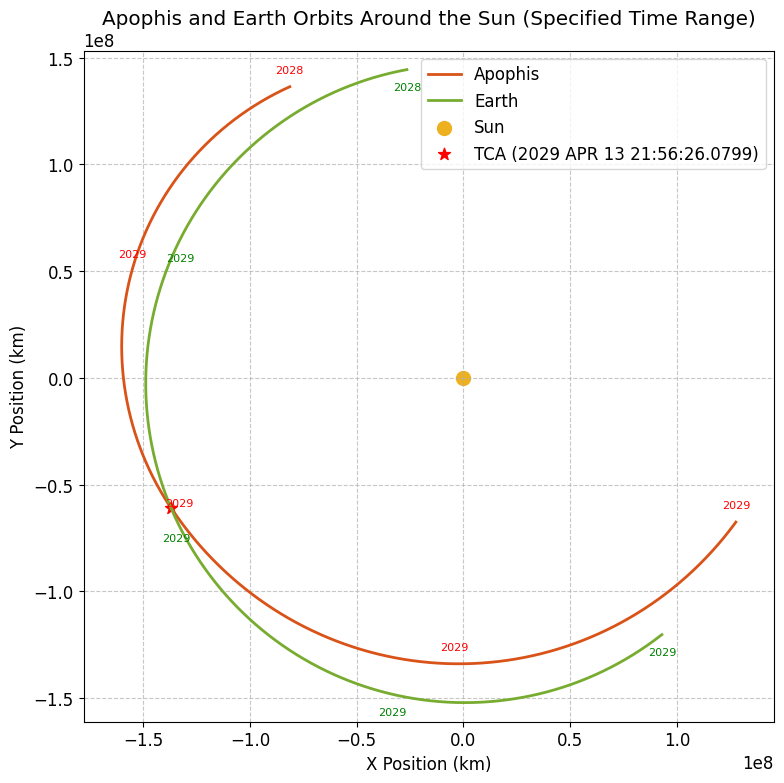

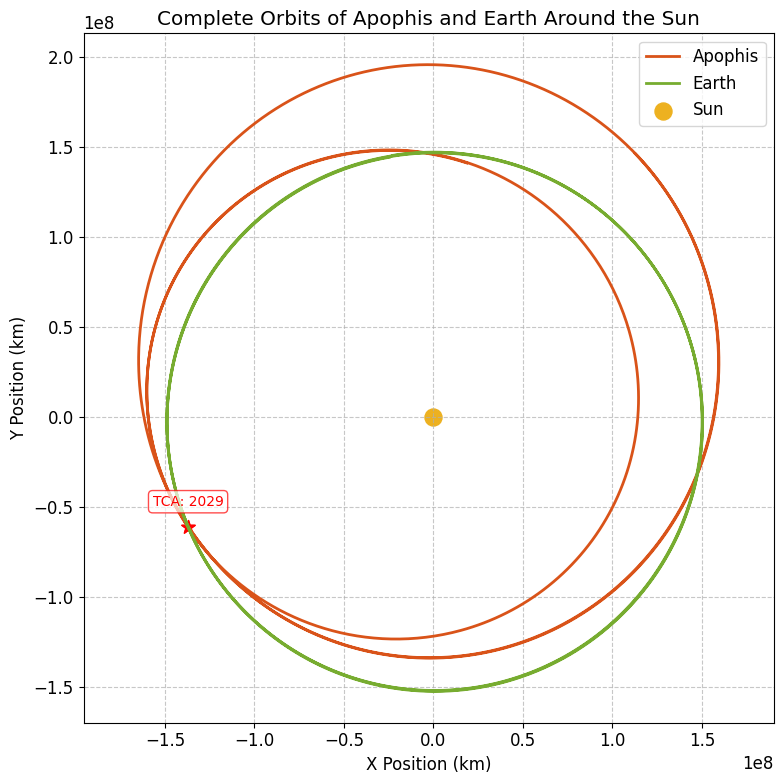

In [28]:
######################## CODE EXPLANATION 3 ########################
## ang = np.zeros(len(tt)): Since an angle will be calculated for each time point, a NumPy array consisting of zeros len(tt) is created.
# for n in range(len(tt)): – It loops through all time points (in the tt array).
#                          – Each n represents a time moment.

## dot_product = np.dot(EA_vec[:, n], SA_vec[:, n])
# EA_vec[:, n]: Earth → Apophis vector (vector difference)
# SA_vec[:, n]: Sun → Apophis vector

## cos_angle = np.clip(dot_product / (dist_EA[n] * dist_SA[n]), -1.0, 1.0) 
# np.clip(..., -1.0, 1.0): Limits the result to between -1 and 1 to prevent numeric rounding errors. Otherwise, arccos may return NaN.

# ang[n] = np.arccos(cos_angle) * 180 / np.pi
# np.arccos: Finds angle (in radians) from cosine value AND (*180 / np.pi): Converts radians to degrees

# %%
# Calculate Earth-Apophis-Sun angle
print("Calculating angles...")
ang = np.zeros(len(tt))
for n in range(len(tt)):
    # Calculate dot product and normalize
    dot_product = np.dot(EA_vec[:, n], SA_vec[:, n])
    # Handle potential numerical errors with np.clip
    cos_angle = np.clip(dot_product / (dist_EA[n] * dist_SA[n]), -1.0, 1.0)
    # Convert to degrees
    ang[n] = np.arccos(cos_angle) * 180 / np.pi

# %%
# Find time of closest approach (TCA)
print("Calculating time of closest approach...")
min_dist_idx = np.argmin(dist_EA)
t_TCA_1 = spice.et2utc(tt[min_dist_idx], 'C', 4)
print(f"TCA: {t_TCA_1}")
print(f"Minimum distance to Earth: {dist_EA[min_dist_idx]:,.0f} km ({au_ea[min_dist_idx]:.6f} AU)")

# Analyze ±6 hours around TCA
print("Calculating orbit around TCA...")
t12h = np.linspace(tt[min_dist_idx] - 6*60*60, tt[min_dist_idx] + 6*60*60, 101)
xECEF = np.zeros((3, len(t12h)))  # 3xn matrix for positions

for i, t in enumerate(t12h):
    try:
        pos = spice.spkpos('20099942', t, 'IAU_EARTH', 'NONE', 'EARTH')[0]
        xECEF[:, i] = pos
    except Exception as e:
        if i == 0 or i == len(t12h)-1 or i % 10 == 0:  # Limit error reporting
            print(f"TCA orbit error (point {i}): {e}")

# Convert to lat/lon coordinates
print("Converting coordinates...")
lat = np.zeros(len(t12h))
lon = np.zeros(len(t12h))
radius = np.zeros(len(t12h))

for i in range(len(t12h)):
    # Extract each position vector as a standalone array
    pos_vec = np.array([xECEF[0, i], xECEF[1, i], xECEF[2, i]])
    try:
        r, lo, la = spice.reclat(pos_vec)
        radius[i] = r
        lon[i] = lo
        lat[i] = la
    except Exception as e:
        print(f"Coordinate conversion error (point {i}): {e}")

# Get position at exact TCA
print("Calculating position at TCA...")
try:
    xECEF1 = spice.spkpos('20099942', tt[min_dist_idx], 'IAU_EARTH', 'NONE', 'EARTH')[0]
    # Convert to a standalone numpy array to avoid issues with SPICE
    pos_vec_tca = np.array([xECEF1[0], xECEF1[1], xECEF1[2]])
    radius1, lon1, lat1 = spice.reclat(pos_vec_tca)
    print(f"TCA Earth-centered position: lat={np.degrees(lat1):.2f}°, lon={np.degrees(lon1):.2f}°, alt={radius1/1000:.2f} km")
except Exception as e:
    print(f"TCA position calculation error: {e}")
    # Set fallback values if there's an error
    radius1, lon1, lat1 = 0, 0, 0

# Create output directory for plots
os.makedirs('output', exist_ok=True)

# %%
# Plot Apophis and Earth orbits around Sun for the specified time range
try:
    plt.figure(figsize=(8, 8))
    
    # Plot Apophis and Earth orbits
    plt.plot(xx[0, :], xx[1, :], linewidth=2, color='#D95319', label='Apophis')
    plt.plot(rr_planet[0, :, 0], rr_planet[1, :, 0], linewidth=2, color='#77AC30', label='Earth')
    
    # Plot the Sun at the center
    plt.scatter(0, 0, color='#EDB120', s=100, label='Sun')
    
    # Mark the TCA point
    plt.scatter(xx[0, min_dist_idx], xx[1, min_dist_idx], color='red', s=80, marker='*', label=f'TCA ({t_TCA_1})')
    
    # Mark a few dates along the paths for reference
    date_indices = np.linspace(0, len(tt)-1, 5, dtype=int)
    for idx in date_indices:
        if idx != min_dist_idx:  # Skip if it's close to the TCA point to avoid overlap
            date_str = spice.et2utc(tt[idx], 'C', 0).split()[0]  # Get just the date part
            plt.annotate(date_str, 
                        (xx[0, idx], xx[1, idx]), 
                        textcoords="offset points",
                        xytext=(0, 10), 
                        ha='center',
                        fontsize=8,
                        color='red')
            
            plt.annotate(date_str, 
                        (rr_planet[0, idx, 0], rr_planet[1, idx, 0]), 
                        textcoords="offset points",
                        xytext=(0, -15), 
                        ha='center',
                        fontsize=8,
                        color='green')  # Yazı rengini kırmızı yapar

    
    plt.title('Apophis and Earth Orbits Around the Sun (Specified Time Range)')
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axis('equal')  # Equal aspect ratio
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('output/apophis_earth_orbits_timerange.png', dpi=300)
except Exception as e:
    print(f"Time range orbit plot error: {e}")

# Plot full orbital paths of Apophis and Earth around the Sun
try:
    print("Calculating full orbital paths...")
    
    # Define time range for full orbits (2 years to ensure we get complete orbits)
    full_start = spice.str2et('2028-Jan-01 00:00:00.0000 TDB')
    full_end = spice.str2et('2030-Dec-31 00:00:00.0000 TDB')
    tt_full = np.linspace(full_start, full_end, 2000)  # More points for smoother orbits
    
    # Arrays for positions
    xx_full = np.zeros((6, len(tt_full)))  # Apophis
    earth_full = np.zeros((6, len(tt_full)))  # Earth
    
    # Calculate positions
    for i, t in enumerate(tt_full):
        try:
            state_apophis = spice.spkezr('20099942', t, frame, 'NONE', center)[0]
            state_earth = spice.spkezr('Earth', t, frame, 'NONE', center)[0]
            xx_full[:, i] = state_apophis
            earth_full[:, i] = state_earth
        except Exception as e:
            if i % 200 == 0:  # Limit error reporting
                print(f"Full orbit calculation error (point {i}): {e}")
    
    # Plot full orbits
    plt.figure(figsize=(8, 8))
    
    # Plot orbits
    plt.plot(xx_full[0, :], xx_full[1, :], linewidth=2, color='#D95319', label='Apophis')
    plt.plot(earth_full[0, :], earth_full[1, :], linewidth=2, color='#77AC30', label='Earth')
    
    # Plot Sun at center
    plt.scatter(0, 0, color='#EDB120', s=150, label='Sun')
    
    # Get TCA position from previous calculation and mark it
    tca_x_apophis = xx[0, min_dist_idx]
    tca_y_apophis = xx[1, min_dist_idx]
    tca_x_earth = rr_planet[0, min_dist_idx, 0]
    tca_y_earth = rr_planet[1, min_dist_idx, 0]
    
    plt.scatter(tca_x_apophis, tca_y_apophis, color='red', s=100, marker='*')
    plt.scatter(tca_x_earth, tca_y_earth, color='red', s=100, marker='*')
    plt.plot([tca_x_apophis, tca_x_earth], [tca_y_apophis, tca_y_earth], 'r--', alpha=0.7)
    
    # Add TCA annotation
    tca_midpoint_x = (tca_x_apophis + tca_x_earth) / 2
    tca_midpoint_y = (tca_y_apophis + tca_y_earth) / 2
    plt.annotate(f'TCA: {t_TCA_1.split()[0]}', 
                (tca_midpoint_x, tca_midpoint_y), 
                textcoords="offset points",
                xytext=(0, 15), 
                ha='center',
                fontsize=10,
                color='red',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.7))
    
    # Add a few date markers around the orbits
    apophis_markers = np.linspace(0, len(tt_full)-1, 8, dtype=int)
    earth_markers = np.linspace(0, len(tt_full)-1, 12, dtype=int)
    
    for idx in apophis_markers:
        date_str = spice.et2utc(tt_full[idx], 'C', 0).split()[0]
        if idx == (min_dist_idx + 1) and (min_dist_idx -1):  # Add dates more sparsely
            plt.annotate(date_str, 
                        (xx_full[0, idx], xx_full[1, idx]), 
                        textcoords="offset points",
                        xytext=(0, 10), 
                        ha='center',
                        color='red',
                        fontsize=8)
    
    for idx in earth_markers:
        date_str = spice.et2utc(tt_full[idx], 'C', 0).split()[0]
        if idx == 2029 and 2030:  # Add dates more sparsely
            plt.annotate(date_str, 
                        (earth_full[0, idx], earth_full[1, idx]), 
                        textcoords="offset points",
                        xytext=(0, -15), 
                        ha='center',
                        color='green',
                        fontsize=8)
    
    plt.title('Complete Orbits of Apophis and Earth Around the Sun')
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axis('equal')  # Equal aspect ratio
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('output/apophis_earth_full_orbits.png', dpi=300)
    
    print("Full orbital plots completed!")
except Exception as e:
    print(f"Full orbit plot error: {e}")

print("All visualizations completed successfully!")


We can check the accuracy of the graph we found from the Apophis movement in the link below. <br>
It will be seen that the trajectory pattern is the same. <br>
Link is here, click --> [Apophis Trajectory around Sun](https://www.esa.int/ESA_Multimedia/Images/2021/03/Earth_s_gravity_will_alter_Apophis_orbit_during_2029_flyby)

Drawing plots...
Processing completed!
Plot images have been saved to the 'output' directory.


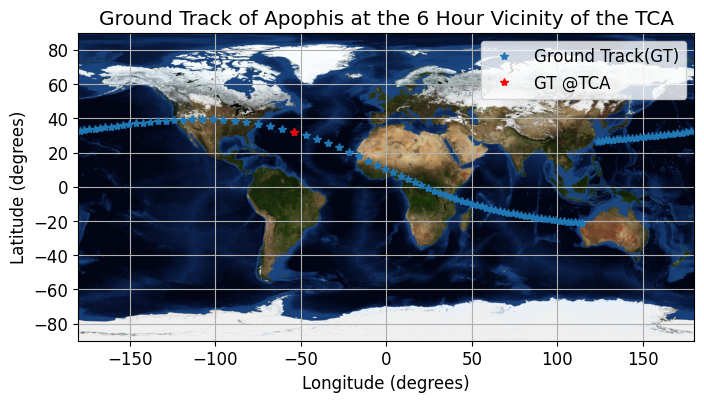

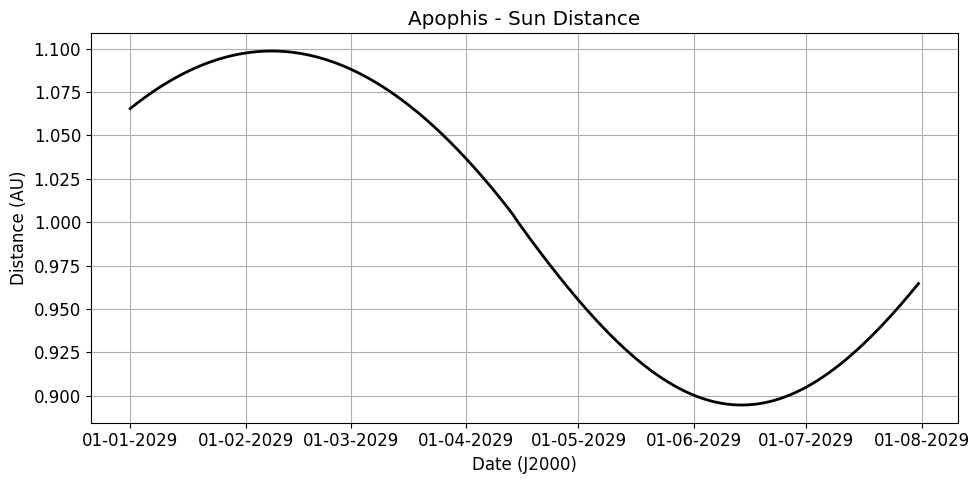

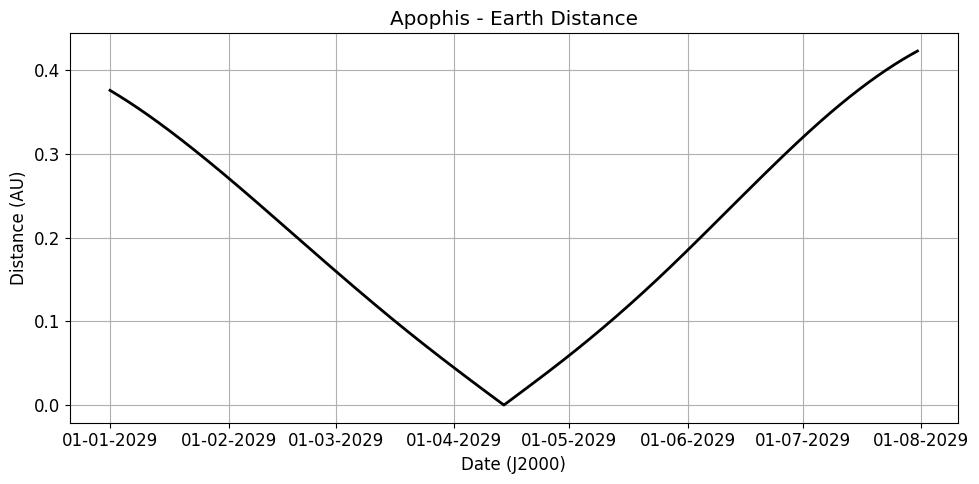

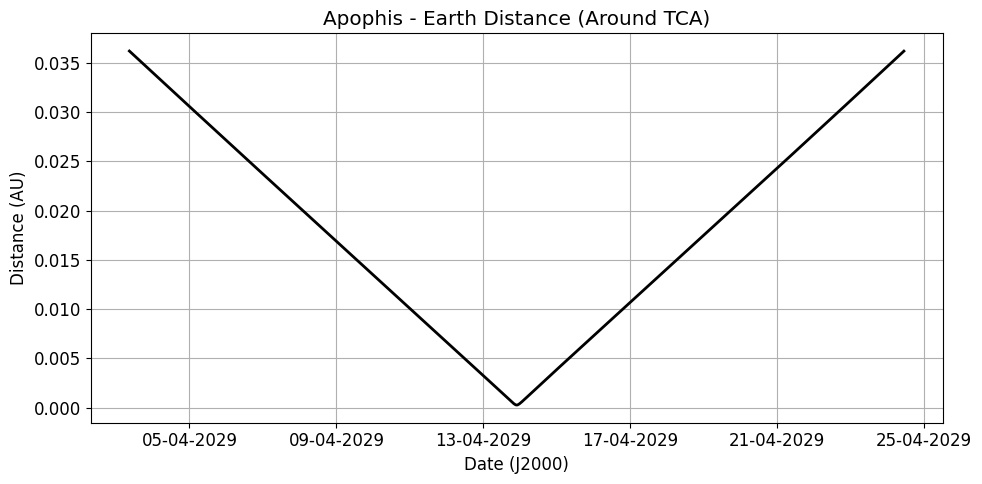

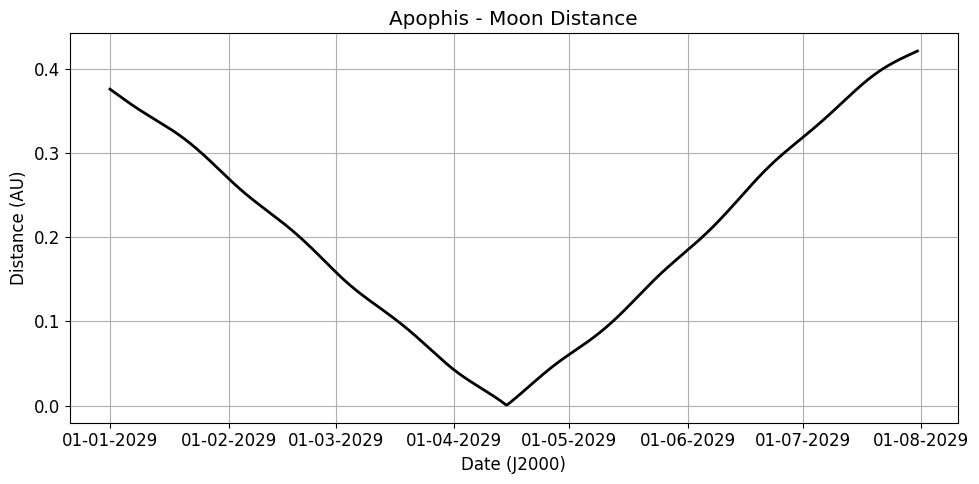

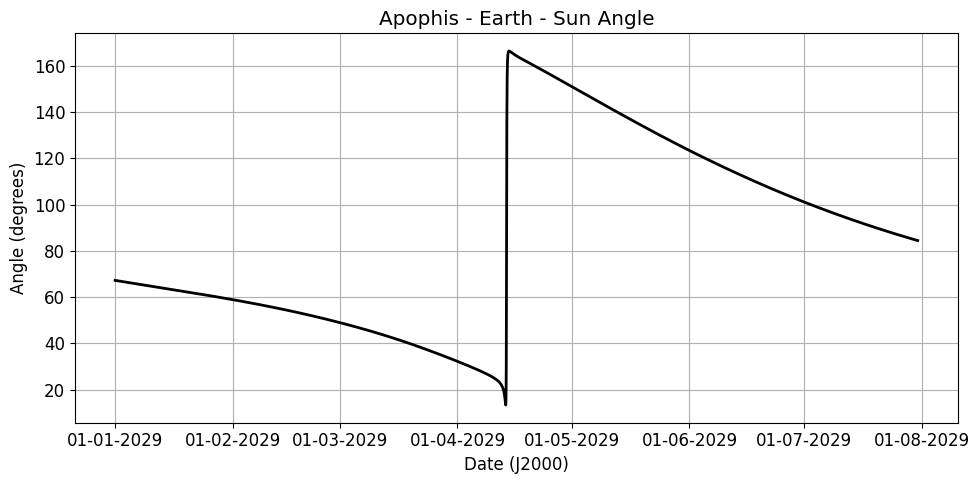

In [29]:

# Plot ground track if MAP.jpg exists
print("Drawing plots...")
map_file = 'MAP.jpg'
if os.path.exists(map_file):
    try:
        plt.figure(figsize=(8, 4))
        MAP = mpimg.imread(map_file)
        plt.imshow(MAP, extent=[-180, 180, -90, 90])
        plt.plot(np.degrees(lon), np.degrees(lat), '*')
        plt.plot(np.degrees(lon[50]), np.degrees(lat[50]), '*', color='r')  # Middle point approx TCA
        plt.title('Ground Track of Apophis at the 6 Hour Vicinity of the TCA')
        plt.legend(['Ground Track(GT)', 'GT @TCA'])
        plt.xlim([-180, 180])
        plt.ylim([-90, 90])
        plt.xlabel('Longitude (degrees)')
        plt.ylabel('Latitude (degrees)')
        plt.grid(True)
        plt.savefig('output/apophis_ground_track.png', dpi=300)
    except Exception as e:
        print(f"Ground track plot error: {e}")
else:
    print(f"Warning: Map file '{map_file}' not found. Skipping ground track plot.")
    # Create a basic ground track without the map
    try:
        plt.figure(figsize=(8, 4))
        plt.plot(np.degrees(lon), np.degrees(lat), '*')
        plt.plot(np.degrees(lon[50]), np.degrees(lat[50]), '*', color='r')  # Middle point approx TCA
        plt.title('Ground Track of Apophis at the 6 Hour Vicinity of the TCA')
        plt.legend(['Ground Track(GT)', 'GT @TCA'])
        plt.xlim([-180, 180])
        plt.ylim([-90, 90])
        plt.xlabel('Longitude (degrees)')
        plt.ylabel('Latitude (degrees)')
        plt.grid(True)
        plt.savefig('output/apophis_ground_track_basic.png', dpi=300)
    except Exception as e:
        print(f"Basic ground track plot error: {e}")

# Plot Apophis-Sun distance
try:
    plt.figure(figsize=(10, 5))
    plt.plot(dateTimes, au_sa, linewidth=2, color='k')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Distance (AU)')
    plt.xlabel('Date (J2000)')
    plt.title('Apophis - Sun Distance')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/apophis_sun_distance.png', dpi=300)
except Exception as e:
    print(f"Sun distance plot error: {e}")

# Plot Apophis-Earth distance
try:
    plt.figure(figsize=(10, 5))
    plt.plot(dateTimes, au_ea, linewidth=2, color='k')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Distance (AU)')
    plt.xlabel('Date (J2000)')
    plt.title('Apophis - Earth Distance')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/apophis_earth_distance.png', dpi=300)
    
    # Add a zoomed in version around the TCA
    plt.figure(figsize=(10, 5))
    center_idx = min_dist_idx
    window = len(dateTimes) // 10  # Show ~10% of data centered on minimum
    start_idx = max(0, center_idx - window // 2)
    end_idx = min(len(dateTimes), center_idx + window // 2)
    
    plt.plot(dateTimes[start_idx:end_idx], au_ea[start_idx:end_idx], linewidth=2, color='k')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Distance (AU)')
    plt.xlabel('Date (J2000)')
    plt.title('Apophis - Earth Distance (Around TCA)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/apophis_earth_distance_zoom.png', dpi=300)
except Exception as e:
    print(f"Earth distance plot error: {e}")

# Plot Apophis-Moon distance
try:
    plt.figure(figsize=(10, 5))
    plt.plot(dateTimes, au_ma, linewidth=2, color='k')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Distance (AU)')
    plt.xlabel('Date (J2000)')
    plt.title('Apophis - Moon Distance')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/apophis_moon_distance.png', dpi=300)
except Exception as e:
    print(f"Moon distance plot error: {e}")

# Plot Apophis-Earth-Sun angle
try:
    plt.figure(figsize=(10, 5))
    plt.plot(dateTimes, ang, linewidth=2, color='k')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Angle (degrees)')
    plt.xlabel('Date (J2000)')
    plt.title('Apophis - Earth - Sun Angle')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/apophis_angle.png', dpi=300)
except Exception as e:
    print(f"Angle plot error: {e}")

print("Processing completed!")
print("Plot images have been saved to the 'output' directory.")
plt.show()
